# **Hydroclimatology Lab 04 Assignment - 02/25/2021**


### _(1) calculate statistics values for "snowfall" data?_

In [10]:
# Let's import the necessary libraries
import pandas as pd                
import numpy as np                 
import matplotlib.pyplot as plt    
import seaborn as sns  
import math                      # for math calculation purposes
from scipy.stats import gamma    # for statistics analysis purposes and fitting Gamma distribution 
from scipy.stats import norm     # for statistics analysis purposes and fitting Normal distribution  
import statistics         # for statistics analysis purposes

     SNOW
Day      
1     7.0
2     7.0
3     7.9
4     6.0
5     4.0
6     3.0
7     4.3
8     4.0
9    10.0
10    6.0
11    7.0
12    2.0
13    2.0
14    2.0
15    5.0
16    4.0
17    3.0
18    4.0
19   10.0
20   11.0
21    5.0
22    8.0
23    9.0
24    2.0
25    6.0
26    6.0
27    7.4
28    3.0
29    8.0
30    4.0
31    5.0
Mean = 5.567741935483871 in
Median = 5.0 in
Mode = 4.0 in
Variance = 6.455591397849463
SD = 2.5407855867525426 in


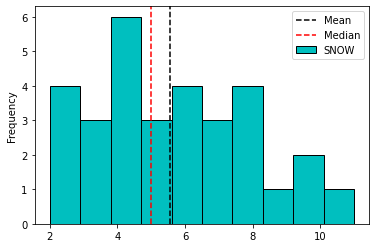

In [11]:
# Let's import the snowfall data we downloaded from NOAA
df = pd.read_csv ("Hayes center noaa snowfall.csv")

# Let's separate the "Date" column to "Day", "Month", and "Year" columns
df ["DATE"] = pd.to_datetime (df["DATE"], errors = "coerce")
df ["Day"] = df["DATE"].dt.day
df ["Month"] = df["DATE"].dt.month
df ["Year"] = df["DATE"].dt.year
df ["Day of Year"] = df ["DATE"].dt.dayofyear

# Let's drop the "NaN" values from the dataframe
df = df.dropna ()

# New Dataframe for snowfall in Jan 2021
df_Jan = df.loc [df["Month"] == 1]
df_Jan_Max = pd.pivot_table (df_Jan, values = ["SNOW"], index = ["Day"], aggfunc = "max")
print (df_Jan_Max)

# Histogram
df_Jan_Max.plot.hist (by = "SNOW", bins = 10, color = "c", edgecolor = "k")

# Calculate Mean
plt.axvline (df_Jan_Max ["SNOW"].mean(), color = "black", linestyle = "dashed", label = "Mean")
print ("Mean = {} in".format(df_Jan_Max ["SNOW"].mean()))

# Calculate Median
plt.axvline (df_Jan_Max ["SNOW"].median(), color = "red", linestyle = "dashed", label = "Median")
print ("Median = {} in".format(df_Jan_Max ["SNOW"].median()))

# Calculate Mode
mode = max (df_Jan_Max ["SNOW"].tolist(), key = df_Jan_Max ["SNOW"].tolist().count)
print ("Mode = {} in".format(mode))

# Calculate Variance
print ("Variance = {}".format(df_Jan_Max ["SNOW"].var()))

# Calculate Standard Deviation (SD)
print ("SD = {} in".format(math.sqrt (df_Jan_Max ["SNOW"].var())))

plt.legend ()

plt.savefig ("1_Histogram.png", dpi = 400)

### _(2) How to calculate and remove seasonal variability from "precipitation" data?_

In [12]:

# Let's import the precipitation data we downloaded from NOAA
df = pd.read_csv ("Hayes center noaa precipitation.csv")
print(df)
print (df.dtypes)

# Let's separate the "Date" column to "Day", "Month", and "Year" columns
df ["DATE"] = pd.to_datetime (df["DATE"], errors = "coerce")
df ["Day"] = df["DATE"].dt.day
df ["Month"] = df["DATE"].dt.month
df ["Year"] = df["DATE"].dt.year
df ["Day of Year"] = df ["DATE"].dt.dayofyear
print (df)

# Let's count how many days are missing values in "Snow" column
df.isnull().sum()

# Let's drop the "NaN" values from the dataframe
df = df.dropna ()

# Check the updated dataframe without missing values
df.isnull().sum()

print(df)

           STATION                      NAME        DATE  PRCP
0      USW00024020  HAYES CENTER 1 NW, NE US  1894-12-01   0.0
1      USW00024020  HAYES CENTER 1 NW, NE US  1894-12-02   0.0
2      USW00024020  HAYES CENTER 1 NW, NE US  1894-12-03   0.0
3      USW00024020  HAYES CENTER 1 NW, NE US  1894-12-04   0.0
4      USW00024020  HAYES CENTER 1 NW, NE US  1894-12-05   0.0
...            ...                       ...         ...   ...
45568  USW00024020  HAYES CENTER 1 NW, NE US    3/2/2021   0.0
45569  USW00024020  HAYES CENTER 1 NW, NE US    3/3/2021   0.0
45570  USW00024020  HAYES CENTER 1 NW, NE US    3/4/2021   0.0
45571  USW00024020  HAYES CENTER 1 NW, NE US    3/5/2021   0.0
45572  USW00024020  HAYES CENTER 1 NW, NE US    3/6/2021   0.0

[45573 rows x 4 columns]
STATION     object
NAME        object
DATE        object
PRCP       float64
dtype: object
           STATION                      NAME       DATE  PRCP  Day  Month  \
0      USW00024020  HAYES CENTER 1 NW, NE US 1894-1

           STATION                      NAME       DATE  PRCP  Day  Month  \
182    USW00024020  HAYES CENTER 1 NW, NE US 1895-07-01  0.00    1      7   
183    USW00024020  HAYES CENTER 1 NW, NE US 1895-07-02  0.35    2      7   
184    USW00024020  HAYES CENTER 1 NW, NE US 1895-07-03  0.00    3      7   
185    USW00024020  HAYES CENTER 1 NW, NE US 1895-07-04  0.00    4      7   
186    USW00024020  HAYES CENTER 1 NW, NE US 1895-07-05  0.00    5      7   
...            ...                       ...        ...   ...  ...    ...   
45381  USW00024020  HAYES CENTER 1 NW, NE US 2020-08-27  0.00   27      8   
45382  USW00024020  HAYES CENTER 1 NW, NE US 2020-08-28  0.00   28      8   
45383  USW00024020  HAYES CENTER 1 NW, NE US 2020-08-29  0.00   29      8   
45384  USW00024020  HAYES CENTER 1 NW, NE US 2020-08-30  0.00   30      8   
45385  USW00024020  HAYES CENTER 1 NW, NE US 2020-08-31  0.00   31      8   

       Year  Day of Year  
182    1895          182  
183    1895          

<Figure size 1080x720 with 0 Axes>

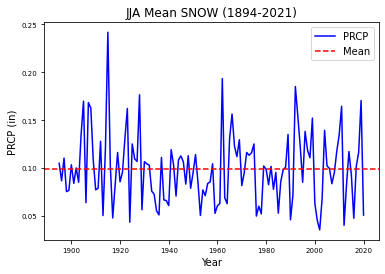

In [13]:
# Let's create a new dataframe including only June, July, and August precipitation data
df_new = df.loc [(df["Month"] == 6) | (df["Month"] == 7) | (df["Month"] == 8)]
print (df_new)

df_JJA = pd.pivot_table (df_new, values = ["PRCP"], index = ["Year"], aggfunc = "mean")
print (df_JJA)

# Plot
plt.figure (figsize = (15, 10))      # Size of figure
ax = df_JJA.plot (color = "Blue")    # Plot the precipitation data

plt.axhline (df_JJA ["PRCP"].mean(), linestyle = "dashed", label = "Mean", c = "red")     # Plot the mean value

plt.title ("JJA Mean SNOW (1894-2021)")
plt.xlabel ("Year")
plt.ylabel ("PRCP (in)")
plt.legend ()
ax.tick_params (labelsize = 7)
plt.savefig ("2_JJA_PRCP.png", dpi = 400)

          PRCP
Year          
1895  0.006101
1896 -0.012269
1897  0.011542
1898 -0.023464
1899 -0.022160
...        ...
2016 -0.051291
2017  0.002840
2018  0.017405
2019  0.071644
2020 -0.048030

[126 rows x 1 columns]


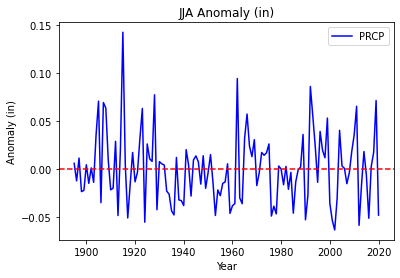

In [14]:
df_anomaly = df_JJA - df_JJA["PRCP"].mean()
print (df_anomaly)

# Plot the Anomalies
ax = df_anomaly.plot (color = "blue")

plt.axhline (df_anomaly ["PRCP"].mean(), linestyle = "dashed", label = "Mean", c = "red")     # Plot the mean value

plt.title ("JJA Anomaly (in)")
plt.xlabel ("Year")
plt.ylabel ("Anomaly (in)")
plt.savefig ("3_Anomaly.png", dpi = 400)

### _(3) How to perform trend analysis (Mann_Kendall test) for "precipitation" data?_

In [10]:
# Install the necessary package
!pip install pymannkendall

  Using cached pymannkendall-1.4.1-py3-none-any.whl (12 kB)


In [15]:
# Import the installed package into the Jupyter notebook environment
import pymannkendall as mk

In [16]:
# Let's perform the test on annual snow in the period of 1973-2021:
df_annual = pd.pivot_table (df, values = ["PRCP"], index = ["Year"], aggfunc = "sum")
print (df_annual)

# Mann_Kendall test
mk.original_test (df ["PRCP"].tolist ())

       PRCP
Year       
1894   0.21
1895  14.02
1896  16.66
1897  18.85
1898  15.52
...     ...
2017  25.23
2018  26.78
2019  27.80
2020  12.58
2021   0.73

[128 rows x 1 columns]


Mann_Kendall_Test(trend='increasing', h=True, p=0.0011676723340321438, z=3.2466613645402713, Tau=0.007037783256543138, s=7245492.0, var_s=4980370555147.333, slope=0.0, intercept=0.0)

### Here is how to interpret the output of the test:
#### <span style='background: yellow'> _trend: This tells the trend. Possible output includes increasing, decreasing, or no trend_ </span>
#### <span style='background: yellow'> _h: True if trend is present. False if no trend is present._ </span>
#### <span style='background: yellow'> _The p-value of the test._ </span>
##### z: The normalize test statistic.
##### Tau: Kendall Tau.
##### s: Mann-Kendal’s score
##### var_s: Variance S
##### slope: Theil-Sen estimator/slope
##### intercept: Intercept of Kendall-Theil Robust Line

#### Source: https://www.statology.org/mann-kendall-test-python/

### _(4) How to fit "Gamma" distribution to "snowfall" data?_

Gamma Distribution Parameters: shape = 2.298753560524397, location = 1.2903443244473431, scale = 1.8607479701368073
Normal Distribution Parameters: mu = 5.567741935483871, std = 2.4994692464697117


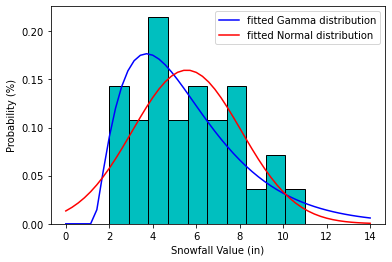

In [9]:
# Fit Gamma distribution to the data
y = df_Jan_Max ["SNOW"].tolist ()
param = gamma.fit (y) # fitting Gamma to y (snowfall data)
print ("Gamma Distribution Parameters: shape = {}, location = {}, scale = {}".format (list(param)[0], list(param)[1], list(param)[2]))

# Plot
x = np.linspace (0, 14, 50)
pdf_fitted = gamma.pdf(x, *param) 
plt.plot (x, pdf_fitted, color = "blue", label = "fitted Gamma distribution")


# Fit Normal distribution to the data
param = norm.fit (y) # fitting Normal to y (snowfall data)
print ("Normal Distribution Parameters: mu = {}, std = {}".format (list(param)[0], list(param)[1]))

# Plot
x = np.linspace (0, 14, 50)  # you can change the value 14, depending on the maximum value of your data
pdf_fitted = norm.pdf(x, *param) 
plt.plot (x, pdf_fitted, color = "red", label = "fitted Normal distribution")

# plot the histogram of snowfall data
plt.hist (y, bins = 10, density = True, color = "c",  edgecolor = "k")
plt.xlabel ("Snowfall Value (in)")
plt.ylabel ("Probability (%)")
plt.legend ()

plt.savefig ("4_Fitting_Distribution.png", dpi = 400)